In [1]:
import os
import platform 
import tensorflow as tf 
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
mnist = tf.keras.datasets.mnist
print("loading")
(x_train, y_train),(x_test, y_test) = mnist.load_data()
print("loaded")
x_train, x_test = x_train/255.0, x_test/255.0 
x_train=np.expand_dims(x_train, axis=3) 
x_test=np.expand_dims (x_test, axis=3)
print("preparing model")

loading
loaded
preparing model


In [9]:
y_train[0]

5

In [3]:
plt.ioff()
mnist = tf.keras.datasets.mnist
print("loading")
(x_train, y_train),(x_test, y_test) = mnist.load_data()
print("loaded")
x_train, x_test = x_train/255.0, x_test/255.0 
x_train=np.expand_dims(x_train, axis=3) 
x_test=np.expand_dims (x_test, axis=3)
print("preparing model")
model = tf.keras.models.Sequential([ 
tf.keras.layers.Conv2D(32, kernel_size=(3,3), input_shape=x_train[0].shape, activation='relu'), 
tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'), 
tf.keras.layers.MaxPool2D(pool_size=(2,2)), 
tf.keras.layers.Dropout(0.3), 
tf.keras.layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'), 
tf.keras.layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'), 
tf.keras.layers.MaxPool2D(pool_size=(2,2)), 
tf.keras.layers.Dropout(0.2), 
tf.keras.layers.Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'), 
tf.keras.layers.Dropout(0.25), 
tf.keras.layers.Flatten(), 
tf.keras.layers.Dense(128, activation=tf.nn.relu), 
tf.keras.layers.BatchNormalization(), 
tf.keras.layers.Dropout(0.25), 
tf.keras.layers.Dense(10, activation=tf.nn.softmax), 
]) 
print("compiling")
model.compile(optimizer=tf.keras.optimizers.Adam(0.0001), 
loss=tf.keras.losses.sparse_categorical_crossentropy, 
metrics=['accuracy']) 
print("compilation end")

loading
loaded


W1011 17:45:07.217770 12948 deprecation.py:506] From C:\Users\Admin\.conda\envs\neuro\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


preparing model
compiling
compilation end


In [4]:
model.fit(x_train, y_train, epochs=3, verbose=1) 

Epoch 1/3
60000/60000 [==============================] - 54s 893us/sample - loss: 0.3238 - acc: 0.8999
Epoch 2/3
60000/60000 [==============================] - 48s 798us/sample - loss: 0.0833 - acc: 0.9752
Epoch 3/3
60000/60000 [==============================] - 47s 782us/sample - loss: 0.0608 - acc: 0.9819s - loss: 0.0608 - a


In [5]:
model.save("compiled_mnist.h5")

In [3]:
model = tf.keras.models.load_model("./models/compiled_mnist.h5")

W1011 17:56:43.601958  2072 deprecation.py:506] From C:\Users\Admin\.conda\envs\neuro\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1011 17:56:43.605995  2072 deprecation.py:506] From C:\Users\Admin\.conda\envs\neuro\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1011 17:56:43.605995  2072 deprecation.py:506] From C:\Users\Admin\.conda\envs\neuro\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) wit

In [6]:
for i in range(10):
    os.makedirs("./errors/" + str(i))

In [ ]:
mistakes = []

In [19]:
def save_image(image, prediction, answer, index):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111)
    description = "Image number %d in 'test' array\nRecognised as: %d;  Titled as:%d" % (index, prediction, answer)
    ax.set(title=description)
    ax.imshow(image, cmap="gray_r")
    path = "./errors/%d/%d.png" % (prediction, index)
    #plt.savefig(path)
    
    

In [10]:
for n, pic in enumerate(x_test):
    prediction = model.predict(pic.reshape(1,28,28,1)).argmax()
    answer = y_test[n]
    if prediction != answer:
        save_image(pic[:,:,0], prediction, answer, n)

UnknownError: 2 root error(s) found.
  (0) Unknown: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node conv2d_5/Conv2D}}]]
	 [[dense_1_1/Softmax/_437]]
  (1) Unknown: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node conv2d_5/Conv2D}}]]
0 successful operations.
0 derived errors ignored.

In [5]:
p = model.predict(x_test[0].reshape(1,28,28,1))

In [8]:
tf.keras.losses.sparse_categorical_crossentropy(y_test[0], tf.nn.softmax(p))

<tf.Tensor 'SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits:0' shape=(1,) dtype=float32>

In [11]:
def calculate_loss(ind):
    w = model.predict(x_test[ind].reshape(1,28,28,1))
    sess = tf.compat.v1.Session()
    loss_tensor = tf.keras.losses.sparse_categorical_crossentropy(y_test[ind], tf.nn.softmax(w))
    loss = loss_tensor.eval(session=sess)
    sess.close()
    return loss[0]

In [18]:
calculate_loss(1393)

2.3224044

In [26]:
def show_image(image):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111)
    ax.imshow(image.reshape(28,28), cmap="gray_r")

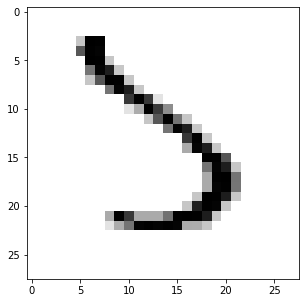

In [28]:
show_image(x_test[1393])